# <font color='blue'>Machine and Deep Learning Solutions for Bank Direct Marketing Campaigns</font>

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore") #To filter the future warnings. 

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)



## 1. Loading the Dataset Under Study

In [2]:
data = pd.read_csv(r'Dataset.csv',delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
np.random.seed(1)
data.sample(n=10)      # random sample of the data 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35577,32,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,mon,114,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
13950,33,blue-collar,single,basic.6y,unknown,yes,yes,cellular,jul,fri,103,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
29451,25,self-employed,divorced,university.degree,no,yes,no,cellular,apr,mon,227,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
32295,34,blue-collar,single,high.school,no,yes,no,cellular,may,fri,56,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
27477,53,technician,married,professional.course,no,yes,no,cellular,nov,fri,11,7,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
31507,46,services,married,basic.9y,no,no,yes,cellular,may,wed,227,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
32167,33,technician,single,professional.course,no,yes,no,cellular,may,fri,70,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
24580,46,technician,married,high.school,no,yes,no,cellular,nov,mon,171,1,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
2954,42,technician,married,professional.course,unknown,no,no,telephone,may,wed,295,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
34998,30,services,single,high.school,no,yes,no,cellular,may,fri,159,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


## 2. Data Understanding

### 2.1 Dimension of of the dataset under study

In [4]:
data.shape

(41188, 21)

### 2.2 Checking the data types of the attributes in the data set under study

In [5]:
data.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data_columns = data.columns.tolist()

num_cols = []
cat_cols = []
for col in data_columns:
    if (data[col].dtype != "object") & (data[col].dtype != "bool") :
        num_cols.append(col)
    else:
        cat_cols.append(col)
print("\nNumerical Columns : \n",num_cols)                          
print("\nCategorical Columms : \n",cat_cols)  


Numerical Columns : 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Columms : 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### 2.3 Descriptive statistics for all quantitative attributes in the data set under study

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### 2.4 Descriptive statistics for all qualitative attributes in the data set under study

In [8]:
data.describe(include = 'object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


### 2.5 Class Distribution

In [9]:
print(data.groupby('y').size())

y
no     36548
yes     4640
dtype: int64


### 2.6 Checking if we have duplicated rows / records

In [10]:
dupes = data.duplicated()
sum(dupes)

12

### 2.7 Checking if we have missing and NULL Values

In [11]:
data.isnull().values.any()

False

In [12]:
data.isnull().sum().sum() 


0

## 3. Data Visualization

### 3. 1 Univariate Visualization

#### 3.1.1 Histograms of the quantitative attributes in data set under study

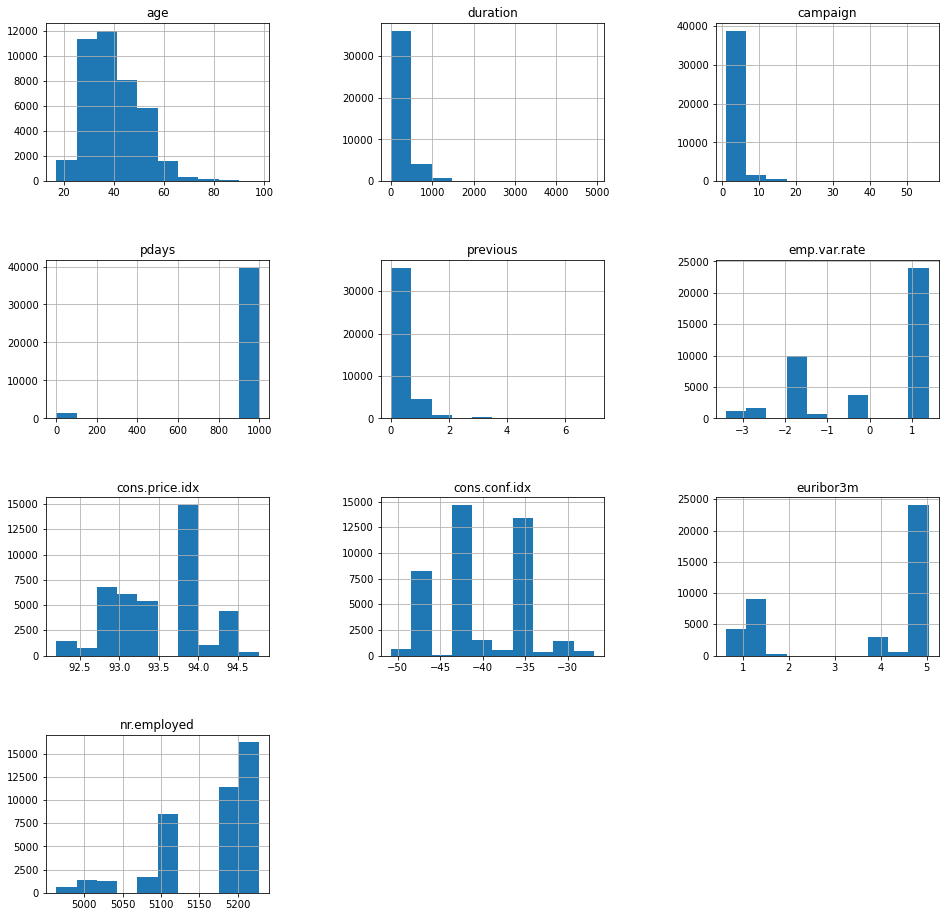

In [13]:
data.hist(figsize=(16,16))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

#### 3.1.2 Box plots of the quantitative attributes in the data set under study

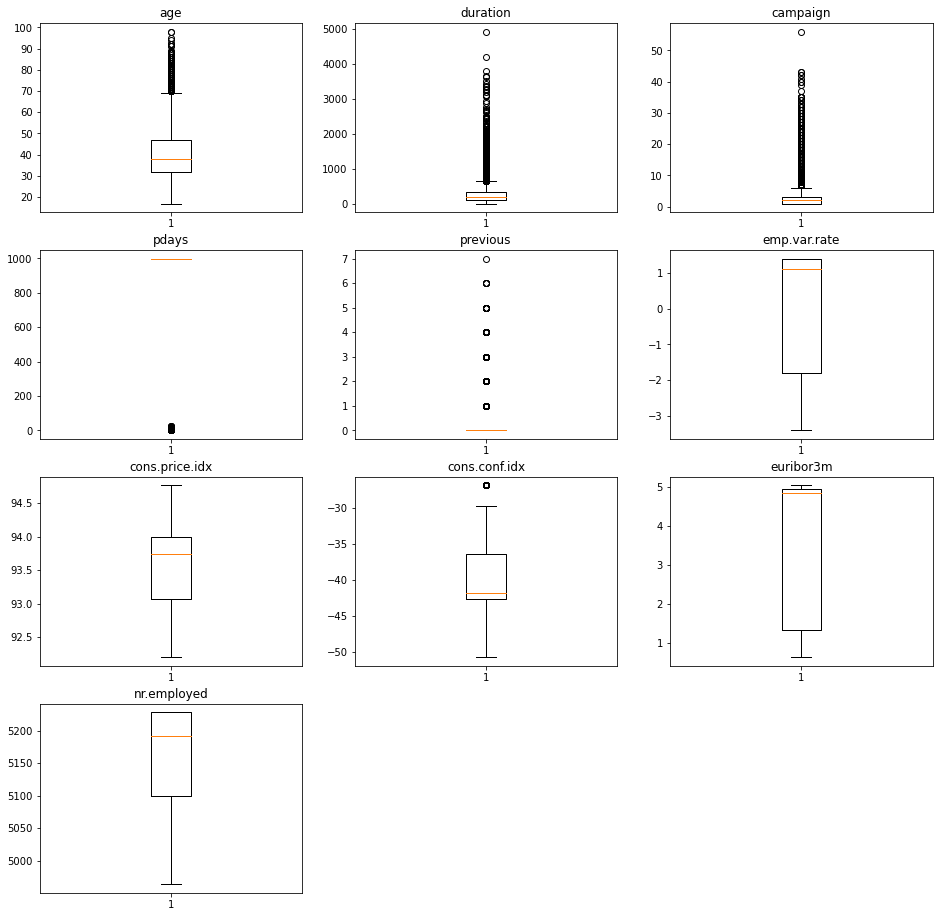

In [14]:
num_features = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(16,16))

for i, j in enumerate(num_features):
    plt.subplot(4,3,i+1)
    plt.boxplot(data[j],whis=1.5)
    plt.title(j)
plt.show()

#### 3.1.3 Bar charts of qualitative attributes in the data set under study

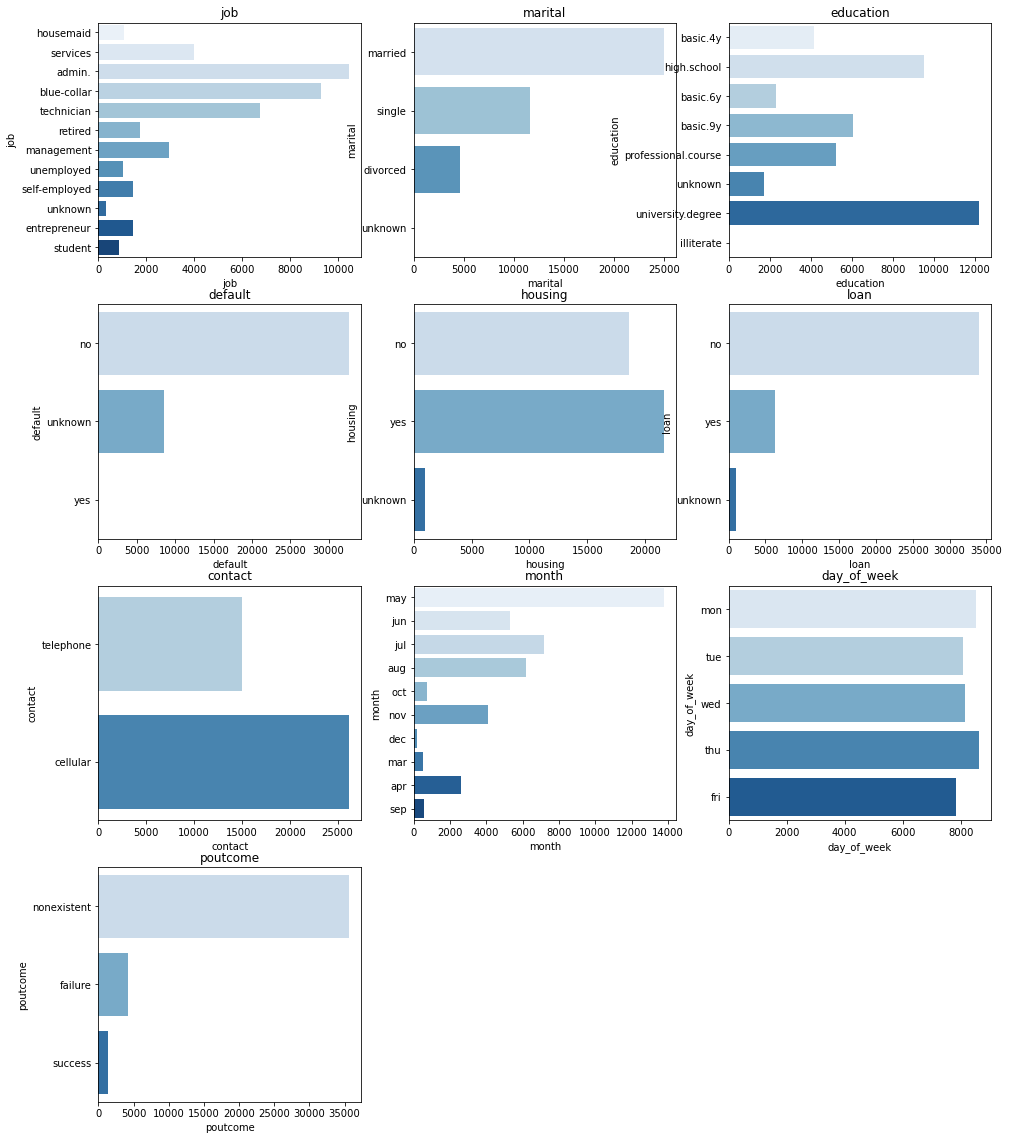

In [15]:
cat_features = data.select_dtypes(exclude = np.number)
plt.figure(figsize=(16,82))
plotNo =1
for i in cat_features:
    ax = plt.subplot(16,3,plotNo)
    sns.countplot(y=i, data=data, palette='Blues')
    plt.xlabel(i)
    plt.title(i)
    plotNo+=1
    if plotNo>10:
        break
plt.show()

### 3. 2 Multivariate Visualization

#### 3.2.1 Histograms by class value of quantitative attributes

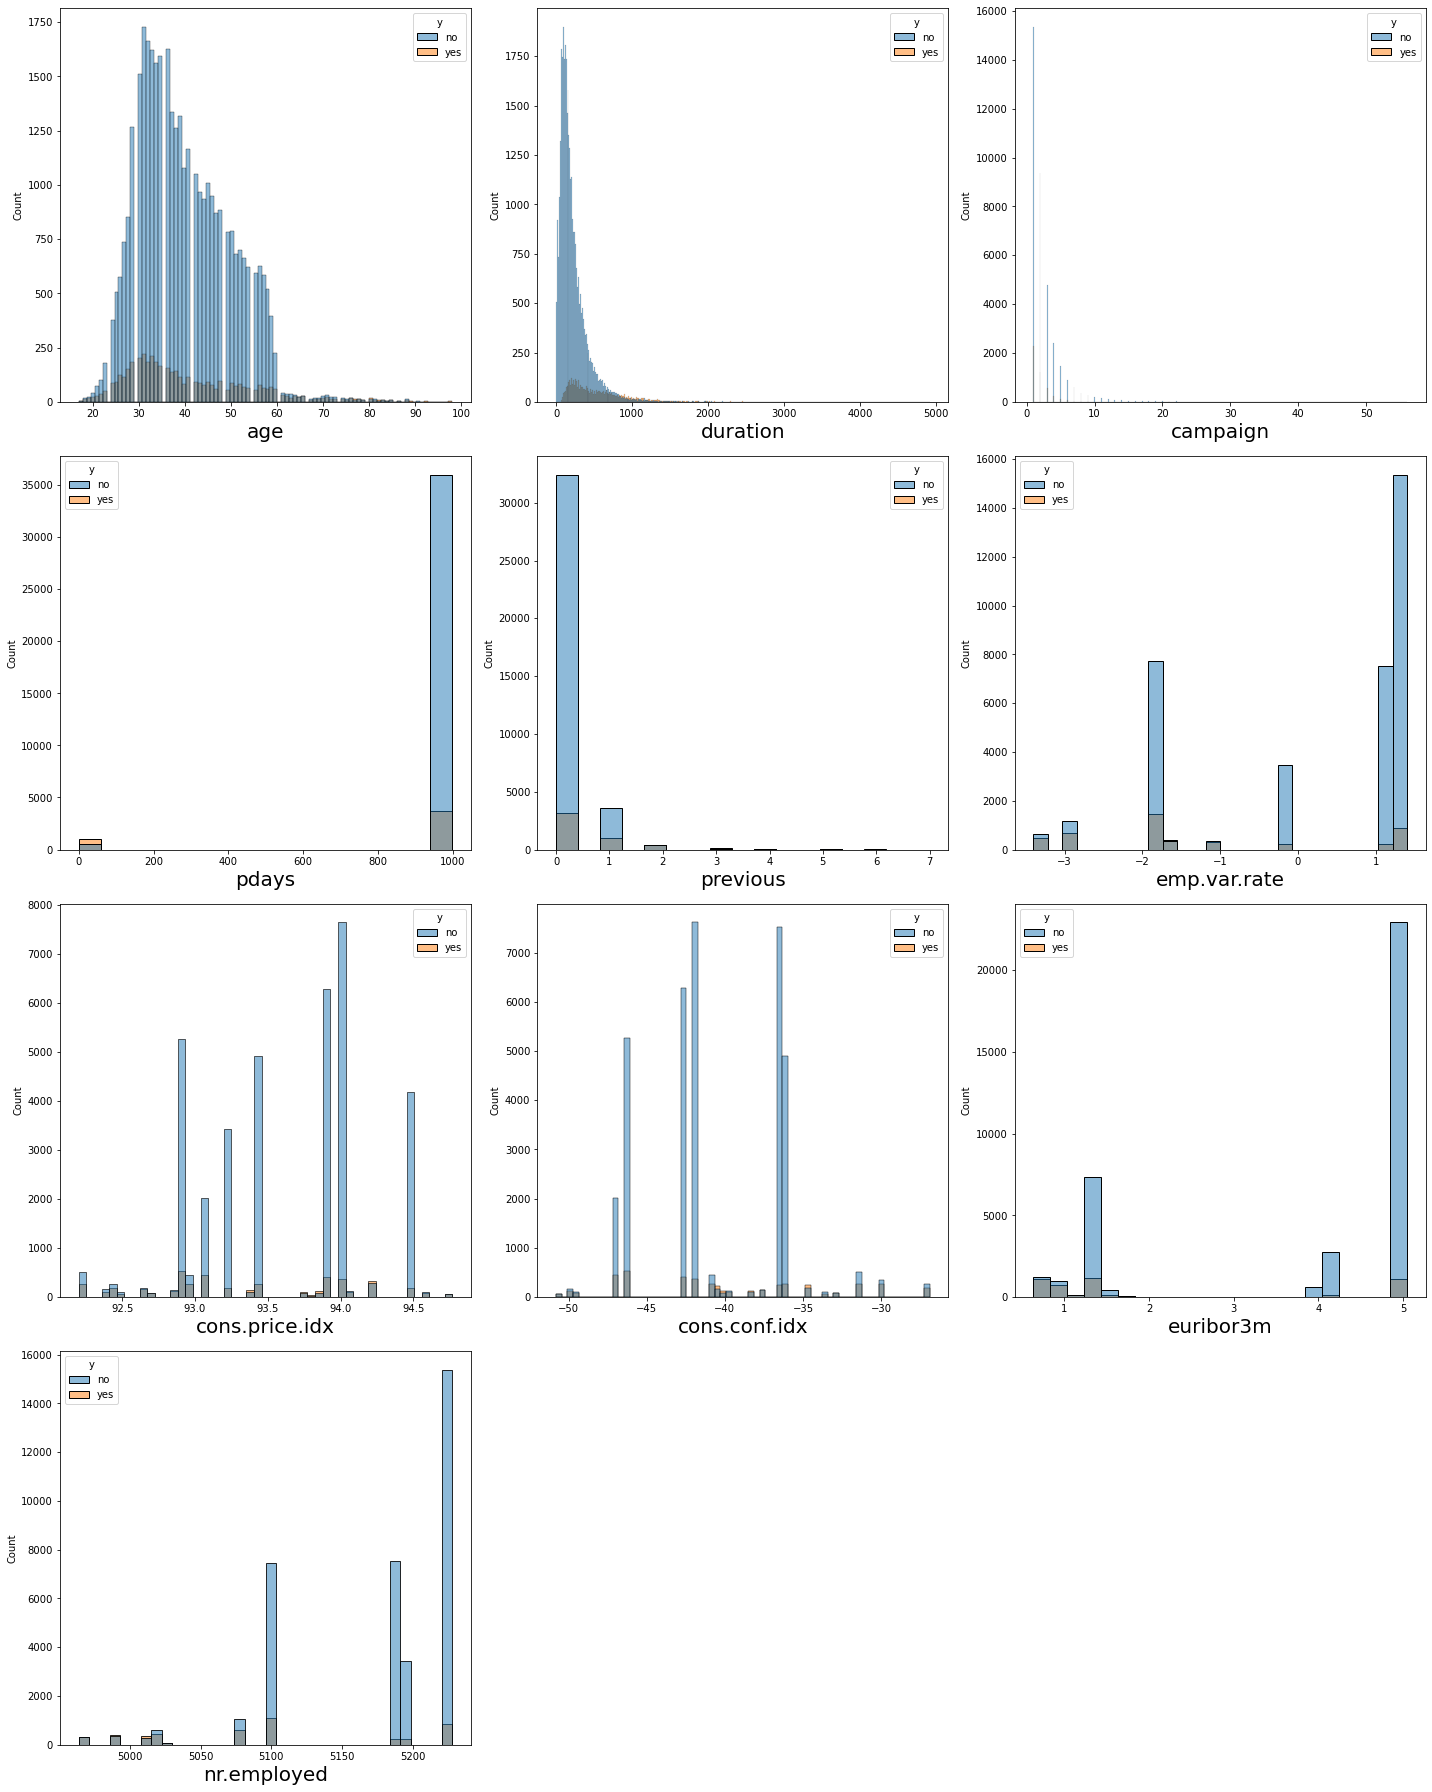

In [16]:
num_features = data.select_dtypes(include = np.number)
plt.figure(figsize=(20,25))
plotNo = 1

for column in num_features:
    ax = plt.subplot(4,3,plotNo)
    sns.histplot(x=num_features[column],hue=data.y)
    plt.xlabel(column,fontsize=20)
    plotNo+=1
plt.tight_layout()

#### 3.2.2 Bar charts by class value of qualitative attributes in the data set under study

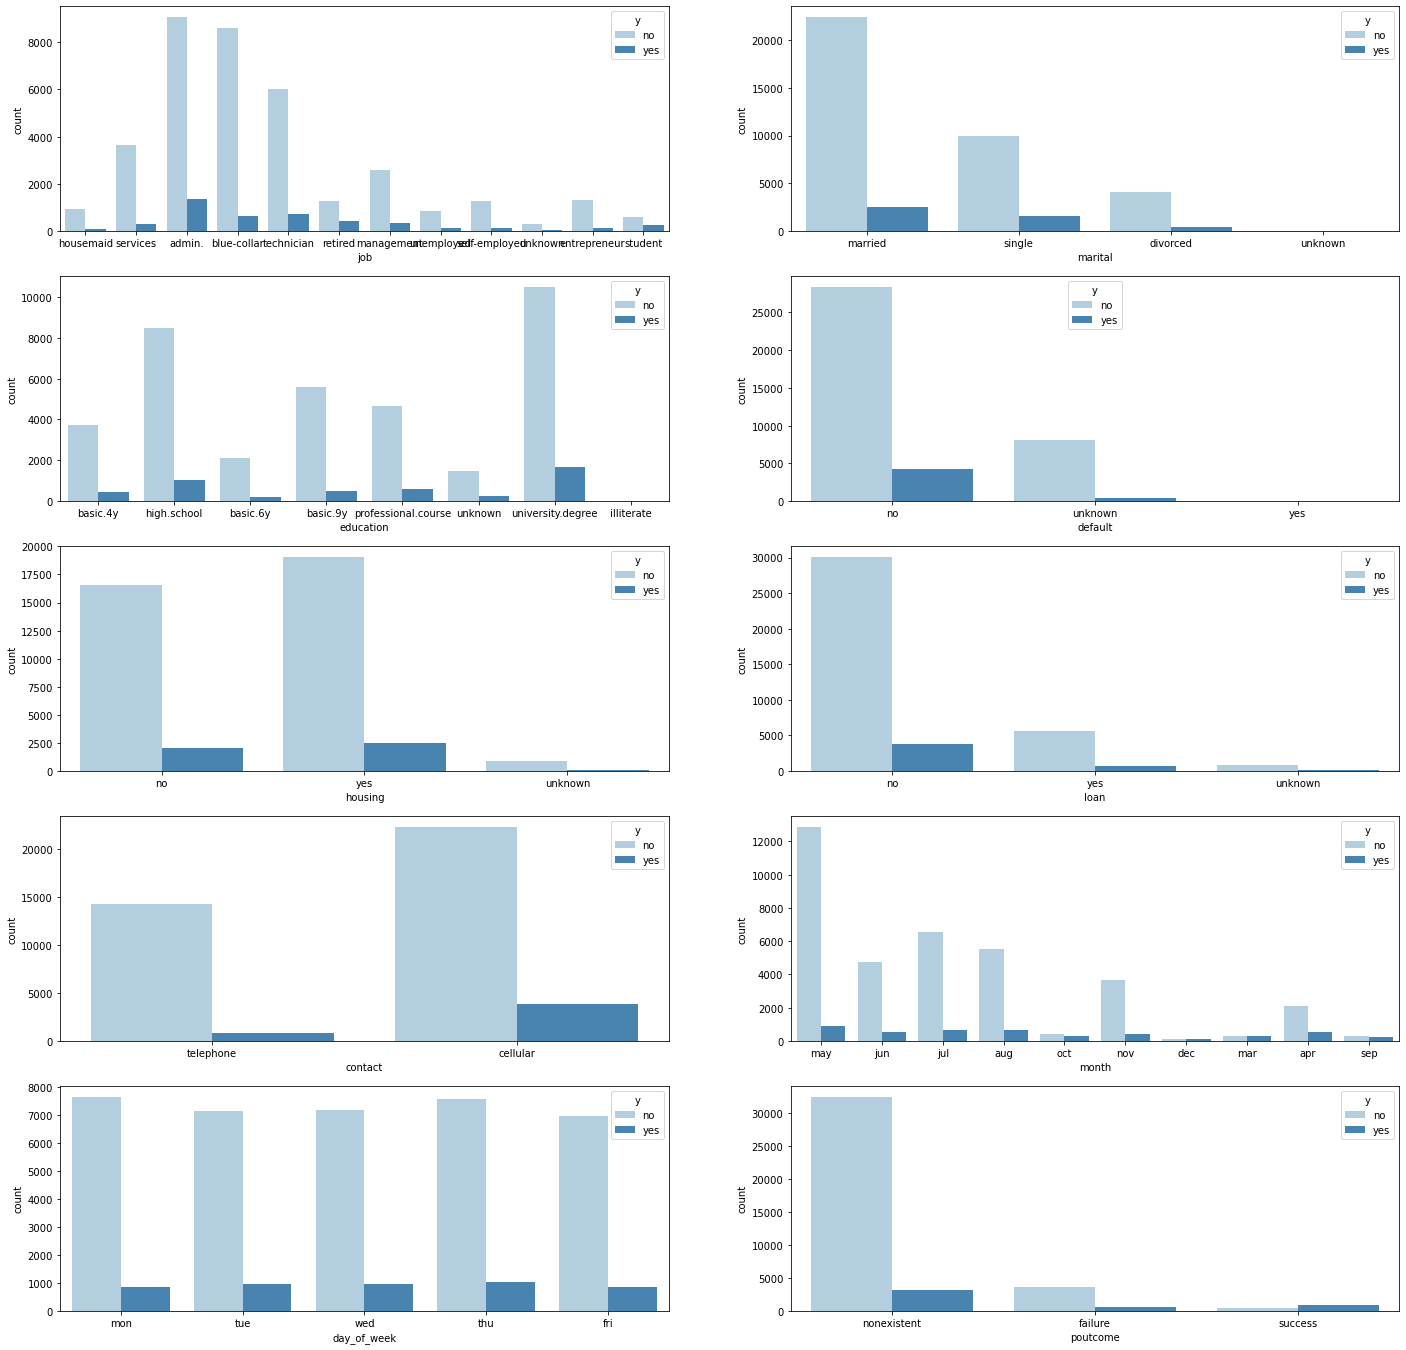

In [17]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(24, 24))
for col, ax in zip(cat_features[0:], axs.ravel()):
    sns.countplot(x=col, data=data, ax=ax,hue=data.y, palette='Blues')

#### 3.2.3 correlation coefficients between the quantitative attributes in the data set under study.


<AxesSubplot:>

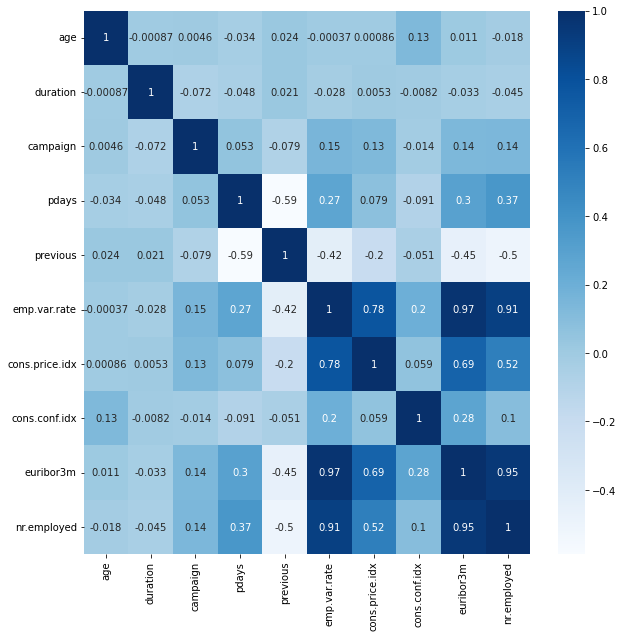

In [18]:
figsize= (10, 10)
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(num_features.corr(),annot=True,cmap='Blues')